[View in Colaboratory](https://colab.research.google.com/github/n-goyal/Elucidata_project/blob/master/PCA.ipynb)

### PCA analysis and Biplot

### the above subplots are displaying the eigon vectors corrosponding to the cohort samples. Which gives us an intiution about how these gene sample are oriented along the principle components. 
 ###      Here I'm trying to put something out of the gene data.
 
 
  **PCA interpretation**
1. Red lines corrosponds to eigon vectors.
2. Data standarization has been done and the first two PC's accounts for ~88% of the total variance of the original dataset.
3. Biplot is plotted to show the relationships among all of the genes and there response to different samples.
3. Talking about the scores, datapoints are well clustered, thus i think the corrosponding samples responds to all the genes quite uniformly, of course outliers are there.
5. 1st principal component (x-axis) was well correlated with the mean response of the genes (symbols), explaining ~80% of the variation. All samples have similar x-axis values and are positive.
6. In the 2nd axis (explaining ~7% of the total variation) contrasts gene response to different samples.
7. As for the 1st axis sample vectors with similar scores (small angles between the vectors) have generated a similar pattern of responses among all the genes taken together.  for example,
  - sample 1,28,29,5,etc. scored positive on 2nd axis are well correlated with each other. similarly samples, 10,14,25,24 etc. scored negative on 2nd axis are also well correlated with each other.
However,  samples that are at =>~ 90 degree with each other are poorly correlated with each other in terms of gene response. for example: sample vector S12 and S10 are at ~90 degree, hence there are poorly correlated (these samples are cohort too, I'll come to that in a second.)

8. cohort samples are plotted again to visualize gene response in the samples, taken at the same time:
 - there are total 10 plots corrosponding to Time column in the meta data.
  
 **Comments on each cohort sample one by one**
 
 - S1 to S3: 
all three sample behaves almost similarly. there a slight angle that shows difference in gene response to each sample.
 - S4 to S6: 
S4 sample gene response is slightly different from S5 and S6. Behaviour of the other two samples is almost same and scored lower than S1 on 2nd axis.
  - S7 to S9: 
S8 scored lower than S7 & S9 on 2nd axis. i think this is because of lower gene response in sample S8 than that of S7 & S9.
  - S10 to S12: 
Judging from the scores of the sample, i can say that sample S12, genes responded almost opposite than S10 & S11. also, S10 and S11 samples are highly correlated in terms of gene response.
 - S13 to S15: 
S14 has scored more negative than S13 & S15 which shows us that gene response in S14 is lower as compare to the other two.
   - S16 to S18: 
S16 has scored negative. judging from the angle between S16 vector and S17 vector, the response behaviour is quite different in these samples.
  - S18 to S21: 
S19 has scored more negative than S20 & S18.
  - S21 to S24: 
 S22 sample gene response scores ~0 on 2nd axis, a much positive score than S22 & S24. this shows higher response of gene in sample S22.
  - S24 to S27: 
  S25 & S26 are correlated with each other and have scored negative. S27 has scored a much higher score on 2nd axis.
  - S28 to S30: 
  S28 & S29 are highly correlated with each other and have scored positive. S30 has scored much higher score on 2nd axis, hence gene in sample S30 are more responsive than the other two.
 

In [0]:
#drive dependencies

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#data dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as pltc
%matplotlib inline
from sklearn.decomposition import PCA

In [0]:
#authenticate

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#accessing the data from drive

file_id = '1ZCiQoI2u-6Muvvpyx8E93F2Ujb5CFEiD'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('Assignment-2_gene_data.csv')

In [187]:
#reading data

df = pd.read_csv('Assignment-2_gene_data.csv', index_col=0)
df.head()
df.dropna(axis=0,inplace=True)
headers = pd.DataFrame(df.columns.tolist())
y = headers[1:]
#preprocessing

df.drop('symbol', axis=1, inplace=True)
df[['S2','S13']] = df[['S2','S13']].apply(pd.to_numeric)
from sklearn.preprocessing import StandardScaler
X_std = pd.DataFrame(StandardScaler().fit_transform(df))
df.head()
X_std.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.089710,0.293465,0.109458,0.390937,0.213910,0.196944,0.257855,0.106869,0.186082,0.149399,...,0.191834,0.182532,0.167993,0.079320,0.209226,0.135964,0.083421,0.103566,0.126626,0.064973
1,-0.108774,-0.135304,-0.129166,-0.112887,-0.144674,-0.161207,-0.141777,-0.144884,-0.144647,-0.124420,...,-0.113288,-0.117418,-0.126280,-0.128334,-0.115224,-0.122716,-0.117513,-0.106798,-0.098000,-0.117826
2,-0.092172,-0.103758,-0.085583,-0.093967,-0.101232,-0.122960,-0.110694,-0.115066,-0.098189,-0.104417,...,-0.105540,-0.106879,-0.114489,-0.117372,-0.110928,-0.114141,-0.102864,-0.099603,-0.086325,-0.109748
3,-0.104313,-0.119747,-0.116386,-0.102483,-0.129731,-0.147154,-0.135311,-0.144884,-0.134677,-0.118481,...,-0.113288,-0.117418,-0.126280,-0.128334,-0.115224,-0.122716,-0.117513,-0.106798,-0.098000,-0.117826
4,-0.108774,-0.135304,-0.129166,-0.112887,-0.144674,-0.161207,-0.141777,-0.144884,-0.144647,-0.124420,...,-0.113288,-0.117418,-0.126280,-0.128334,-0.115224,-0.122716,-0.117513,-0.106798,-0.098000,-0.117826


In [0]:
# scatter matrix (fun)

# pd.scatter_matrix(X_std, alpha = 0.3, figsize = (20,20), diagonal='kde');
# plt.show()

In [189]:
#PCA
n_comp = 2
print('\nRunning PCA...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=None)
X_pca = pca.fit_transform(X_std)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])
    
#print(pca.singular_values_)
pca.explained_variance_ratio_


Running PCA...
Explained variance: 0.8844
Individual variance contributions:
0.809846589839478
0.07458705608248575


array([0.80984659, 0.07458706])

<!-- #  pca analysis

# def pca_results(data, pca):
    
#     # Dimension indexing
#     dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
#     # PCA components
#     components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
#     components.index = dimensions

#     # PCA explained variance
#     ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
#     variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
#     variance_ratios.index = dimensions

#     # Create a bar plot visualization
#     fig, ax = plt.subplots(figsize = (14,8))

#     # Plot the feature weights as a function of the components
#     components.plot(ax = ax, kind = 'bar')
#     ax.set_ylabel("Feature Weights") 
#     ax.set_xticklabels(dimensions, rotation=0)

#     # Display the explained variance ratios# 
#     for i, ev in enumerate(pca.explained_variance_ratio_): 
#         ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

#     # Return a concatenated DataFrame
#     return pd.concat([variance_ratios, components], axis = 1)

# pca_results = pca_results(X_std, X_pca) -->

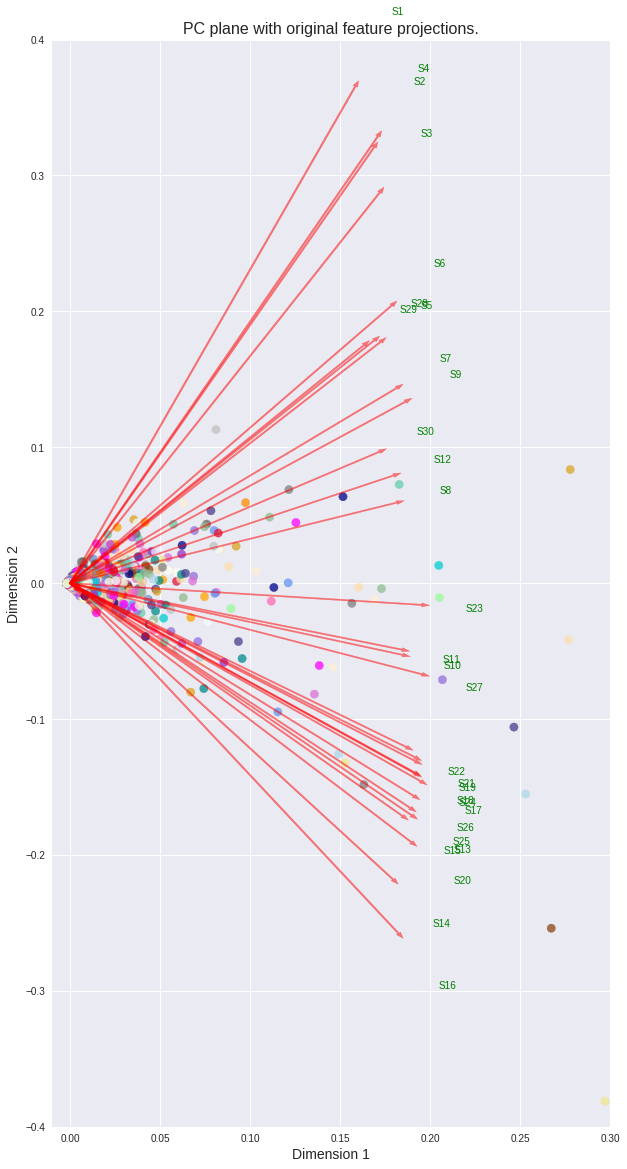

In [190]:
from random import sample
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    fig = plt.figure(figsize=(10,20))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_ylim([-0.4,0.4])
    ax.set_xlim([-0.01,0.3])
#   assigning colors to each component
    all_colors = [k for k,v in pltc.cnames.items()]
    colors = sample(all_colors, n)
    ax.scatter(xs*scalex ,ys*scaley , color=colors, s=70, alpha=0.75)
#   plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    feature_vectors = pca.components_.T

#   projections of the original features
    for j in range(n):
          plt.arrow(0, 0, coeff[j,0], coeff[j,1],color = 'r',alpha = 0.5)
          plt.text(coeff[j,0]* 1.15, coeff[j,1] * 1.15, "S"+str(j+1), color = 'g', ha = 'center', va = 'center')   
    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

#  calling function

biplot(X_pca[:,0:2], np.transpose(pca.components_[:,:]))
plt.show()


In [0]:
# obtaining correlation matrix for the data.

# corr = X_std.corr()
# corr.style.background_gradient()

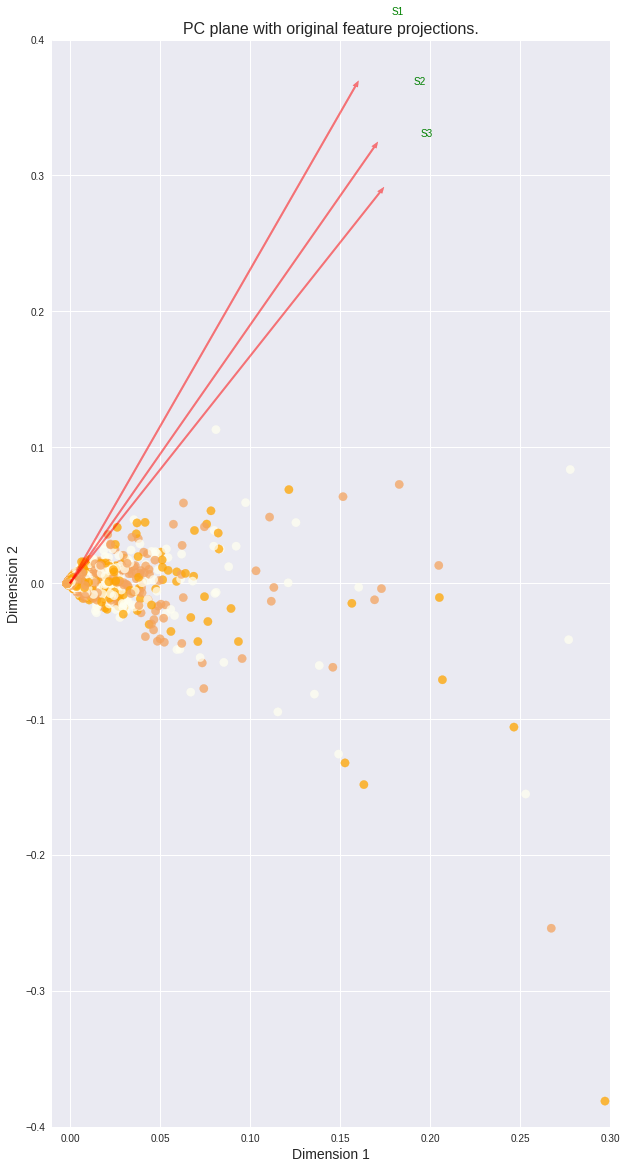

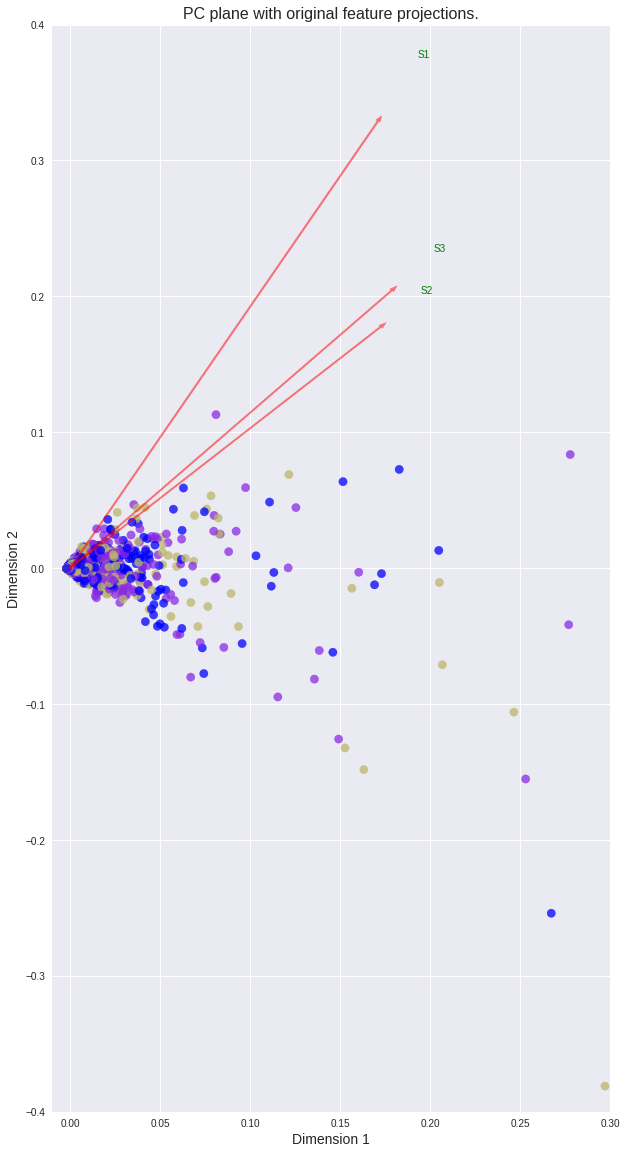

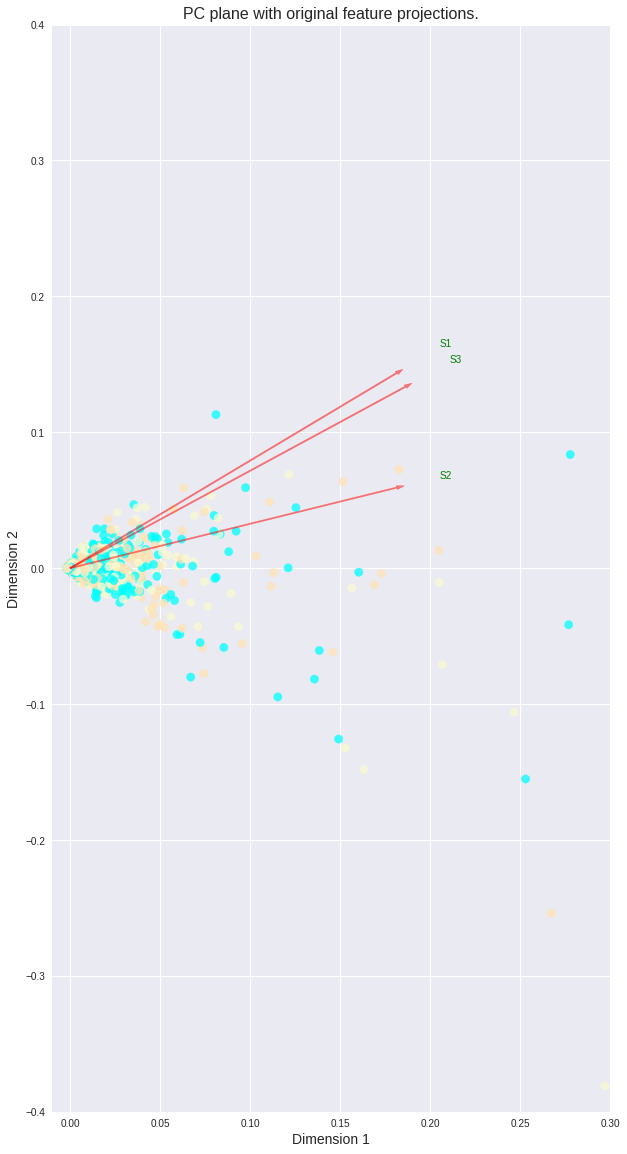

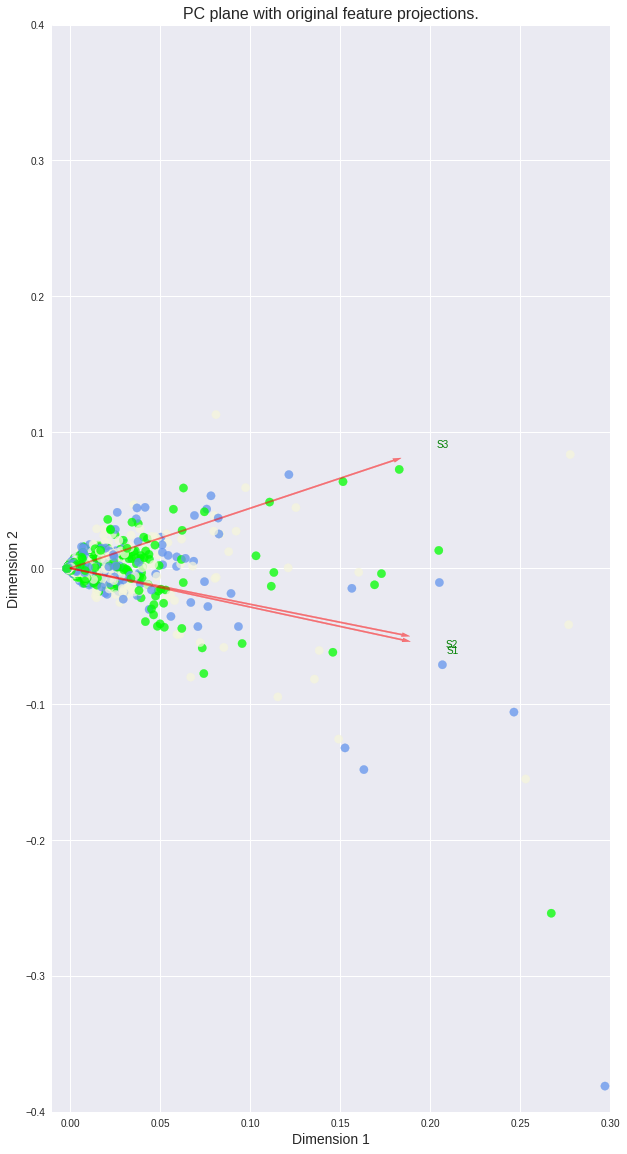

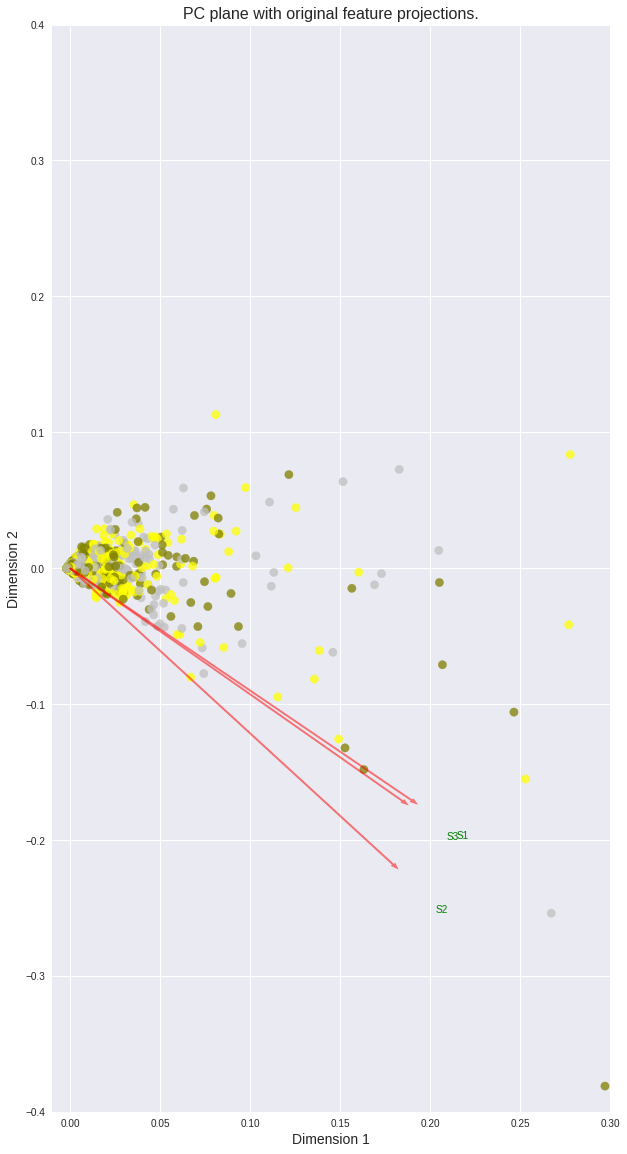

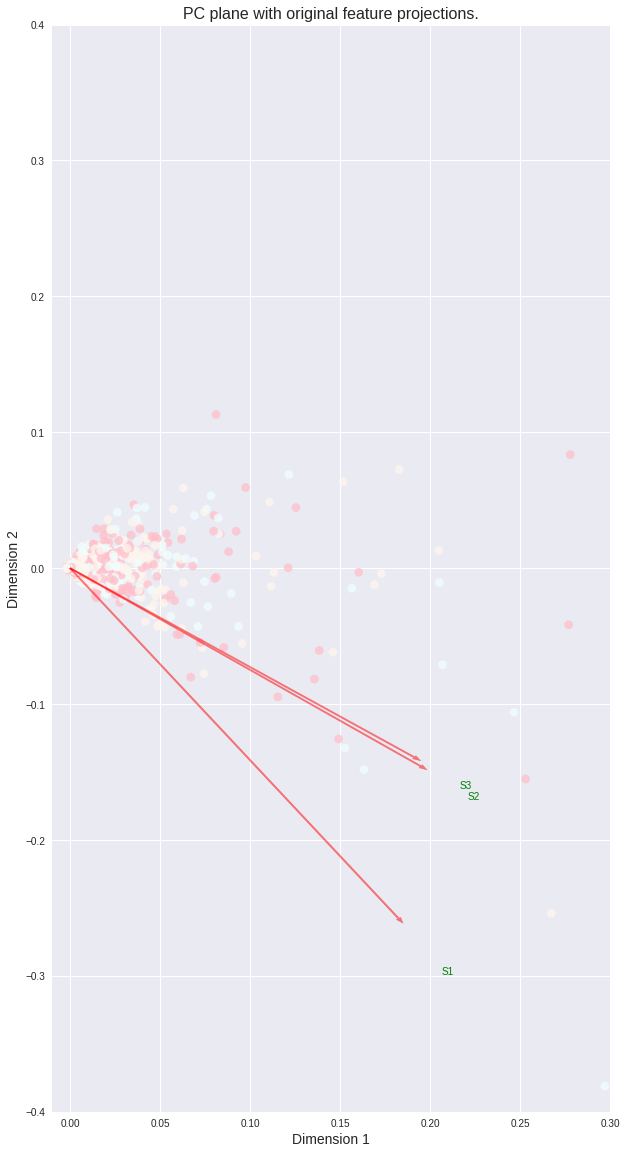

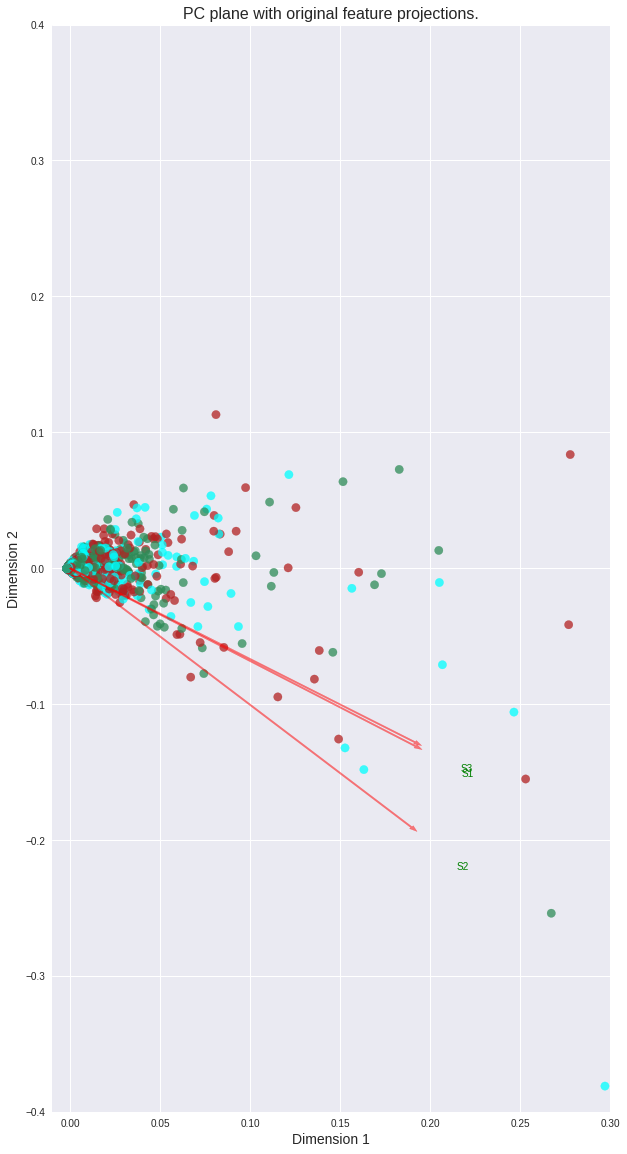

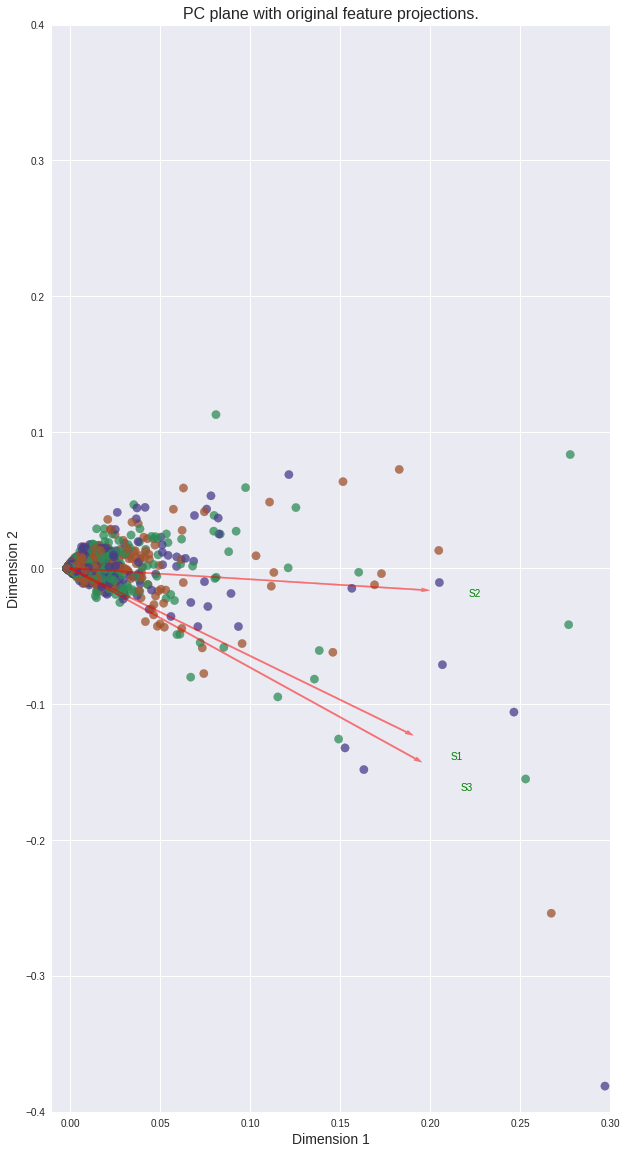

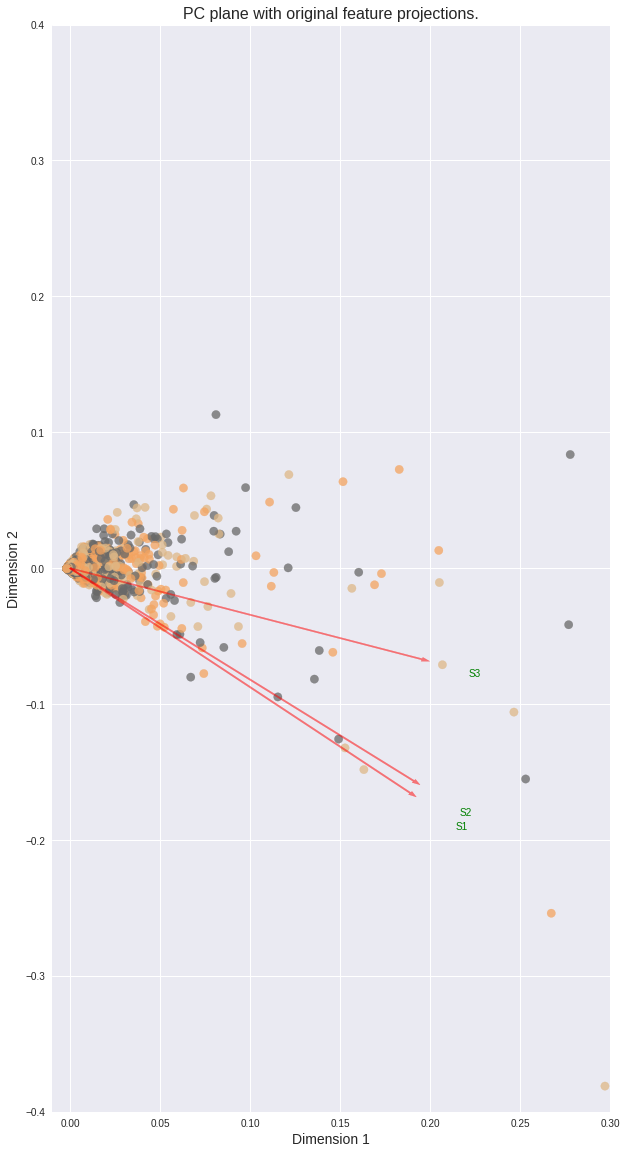

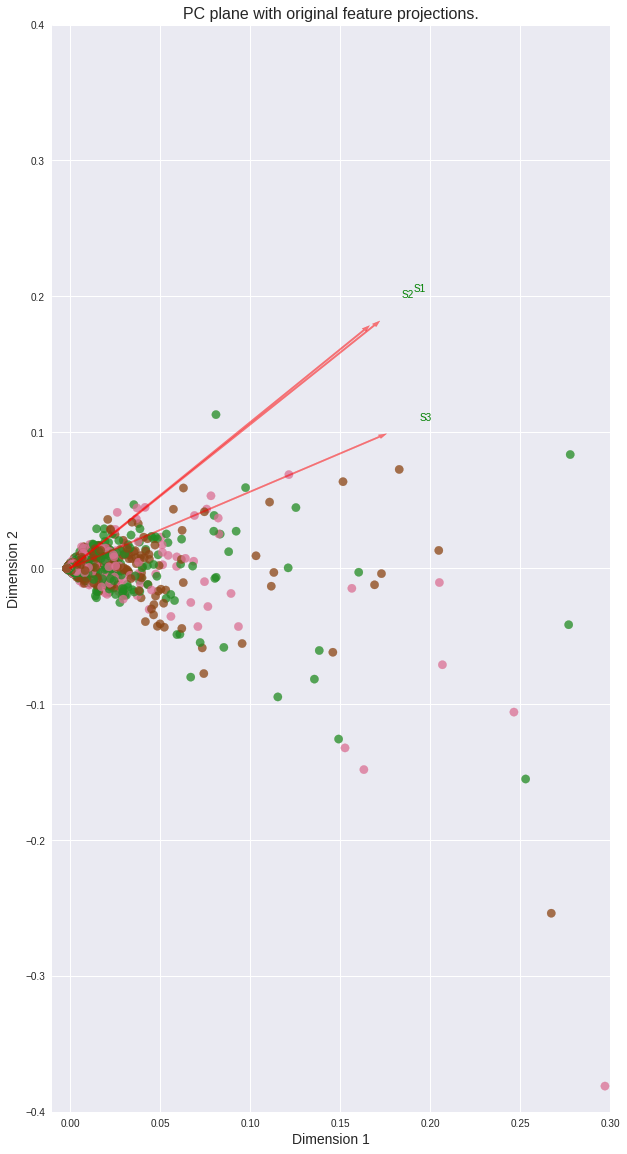

In [192]:
# plotting cohort samples together.

i = 0
while i<30:
  biplot(X_pca[:,0:2], np.transpose(pca.components_[:,i:i+3]))
  i += 3

  **EndNote**
 I understand that this analysis may not be the best but this is first time i encountered the PCA in data exploration before that i have used it directly into models without understanding the function properly. Thank you for this amazing opportunity. Past couple of hours of exploration was simply amazing.


